In [68]:
#importing the libraries and packages we need
import Bio as Bio
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator #used for creating the distance matrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor #used for building the tree
import matplotlib #matplotlib for phylo tree visualization
import matplotlib.pyplot as plt


In [40]:
#importing the sequences that will be used
#for this example i found 16s sequences from different types of avians
#data is taken from GenBank

b1  = SeqIO.read("Bird Genomes/africanostrich.fna", "fasta")
b2  = SeqIO.read("Bird Genomes/chicken.fna", "fasta")
b3  = SeqIO.read("Bird Genomes/commoncanary.fna", "fasta")
b4  = SeqIO.read("Bird Genomes/commonraven.fna", "fasta")
b5  = SeqIO.read("Bird Genomes/emperorpenguin.fna", "fasta")
b6  = SeqIO.read("Bird Genomes/mourningdove.fna", "fasta")
b7  = SeqIO.read("Bird Genomes/peregrinefalcon.fna", "fasta")
b8  = SeqIO.read("Bird Genomes/salmoncrestedcockatoo.fna", "fasta")
b9  = SeqIO.read("Bird Genomes/scarletmacaw.fna", "fasta")
b10  = SeqIO.read("Bird Genomes/snowyowl.fna", "fasta")
b11  = SeqIO.read("Bird Genomes/whitebelliedheron.fna", "fasta")
b12  = SeqIO.read("Bird Genomes/whitetailedeagle.fna", "fasta")

In [56]:
#renaming the sequence ids to make the tree easier to read

b1.id = 'AfricanOstrich'
b2.id = 'Chicken'
b3.id = 'CommonCanary'
b4.id = 'CommonRaven'
b5.id = 'EmperorPenguin'
b6.id = 'MourningDove'
b7.id = "PeregrineFalcon"
b8.id = 'Salmon-crestedCockatoo'
b9.id = 'ScarletMacaw'
b10.id = 'SnowyOwl'
b11.id = 'White-belliedHeron'
b12.id = 'White-tailedEagle'

print(b1.id)

AfricanOstrich


In [57]:
#combining all of the individual renamed sequences into a new file 
birds = SeqIO.write([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12], "birds.fna", "fasta")


After merging the seperate sequences into one file, we can use [MUSCLE](https://www.ebi.ac.uk/Tools/msa/muscle/) to create an alignment file.

Load the sequence file, in this case birds.fna into [MUSCLE](https://www.ebi.ac.uk/Tools/msa/muscle/) and with the output as the clustal (.aln) format, then wait for the job to complete.

Once done, download the alignment file and upload it to the working directory.

In [58]:
#converting the alignment file from clw to aln
alignment = AlignIO.convert("birdsalign.clw", "clustal", "birdsalign.aln", "clustal")

In [59]:
#opening the alignment file as a MSA (Multiple Sequence Alignment) object 
with open("birdsalign.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))



<class 'Bio.Align.MultipleSeqAlignment'>


In [60]:
#initiating the distance calculator using the identity model 

calculator = DistanceCalculator('identity')



In [61]:
#getting the distance matrix
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)



Chicken 0.000000
Salmon-crestedCockatoo  0.248674    0.000000
ScarletMacaw    0.243960    0.175604    0.000000
CommonCanary    0.231585    0.234532    0.233353    0.000000
CommonRaven 0.243371    0.240424    0.241603    0.086623    0.000000
White-tailedEagle   0.233353    0.215675    0.219210    0.196229    0.196818    0.000000
AfricanOstrich  0.219800    0.226282    0.218621    0.208014    0.222746    0.203889    0.000000
PeregrineFalcon 0.245138    0.229817    0.212728    0.228639    0.223925    0.196818    0.210371    0.000000
SnowyOwl    0.237478    0.221567    0.229817    0.226282    0.236299    0.201532    0.200354    0.215675    0.000000
White-belliedHeron  0.221567    0.218621    0.219210    0.188568    0.199764    0.183854    0.195050    0.202711    0.194461    0.000000
EmperorPenguin  0.217443    0.220978    0.213318    0.187979    0.193872    0.175015    0.179140    0.189157    0.181497    0.173836    0.000000
MourningDove    0.210961    0.217443    0.200354    0.192693    0

In [62]:
#initializing the distance tree constructor

constructor = DistanceTreeConstructor(calculator)

In [78]:
#building the tree
birds_tree = constructor.build_tree(alignment)
birds_tree.rooted = True
print(birds_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner10')
        Clade(branch_length=0.0045806938715379705, name='Inner3')
            Clade(branch_length=0.09483647613435475, name='AfricanOstrich')
            Clade(branch_length=0.12496317030053039, name='Chicken')
        Clade(branch_length=0.0008977239245727894, name='Inner9')
            Clade(branch_length=0.003586291985857394, name='Inner8')
                Clade(branch_length=0.003173492437635053, name='Inner6')
                    Clade(branch_length=0.07460223924572777, name='MourningDove')
                    Clade(branch_length=0.0768414849734826, name='EmperorPenguin')
                Clade(branch_length=0.0018353466902376603, name='Inner7')
                    Clade(branch_length=0.08714827637006482, name='White-belliedHeron')
                    Clade(branch_length=0.0036001031231585184, name='Inner5')
                        Clade(branch_length=0.08901738361814966, name='White-tailedEagle')
                        

In [79]:
#saving the tree to a new nexus file
Phylo.write(birds_tree, "birds_tree.nex", "nexus")


1

In [81]:
#drawing a simple ascii version of the tree
Phylo.draw_ascii(birds_tree)

   ______________________________________ AfricanOstrich
 ,|
 ||___________________________________________________ Chicken
 |
 |   _____________________________ MourningDove
 | _|
 || |______________________________ EmperorPenguin
 ,|
 || ___________________________________ White-belliedHeron
 |||
 | |  ___________________________________ White-tailedEagle
_| |_|
 |   |                          __________________ CommonRaven
 |   |_________________________|
 |                             |_______________ CommonCanary
 |
 |  _________________________________________ PeregrineFalcon
 |_|
 | |             __________________________________ ScarletMacaw
 | |____________|
 |              |____________________________________ Salmon-crestedCockatoo
 |
 |_________________________________________ SnowyOwl



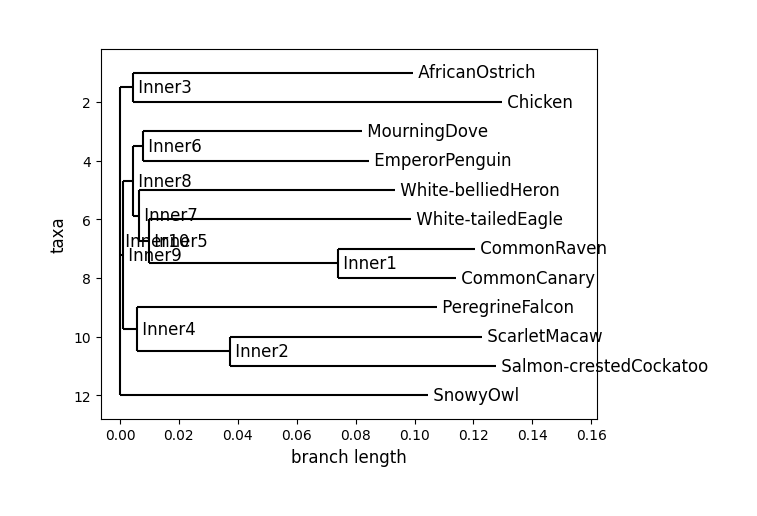

In [82]:
#drawing the tree using matplotlib
fig = Phylo.draw(birds_tree)

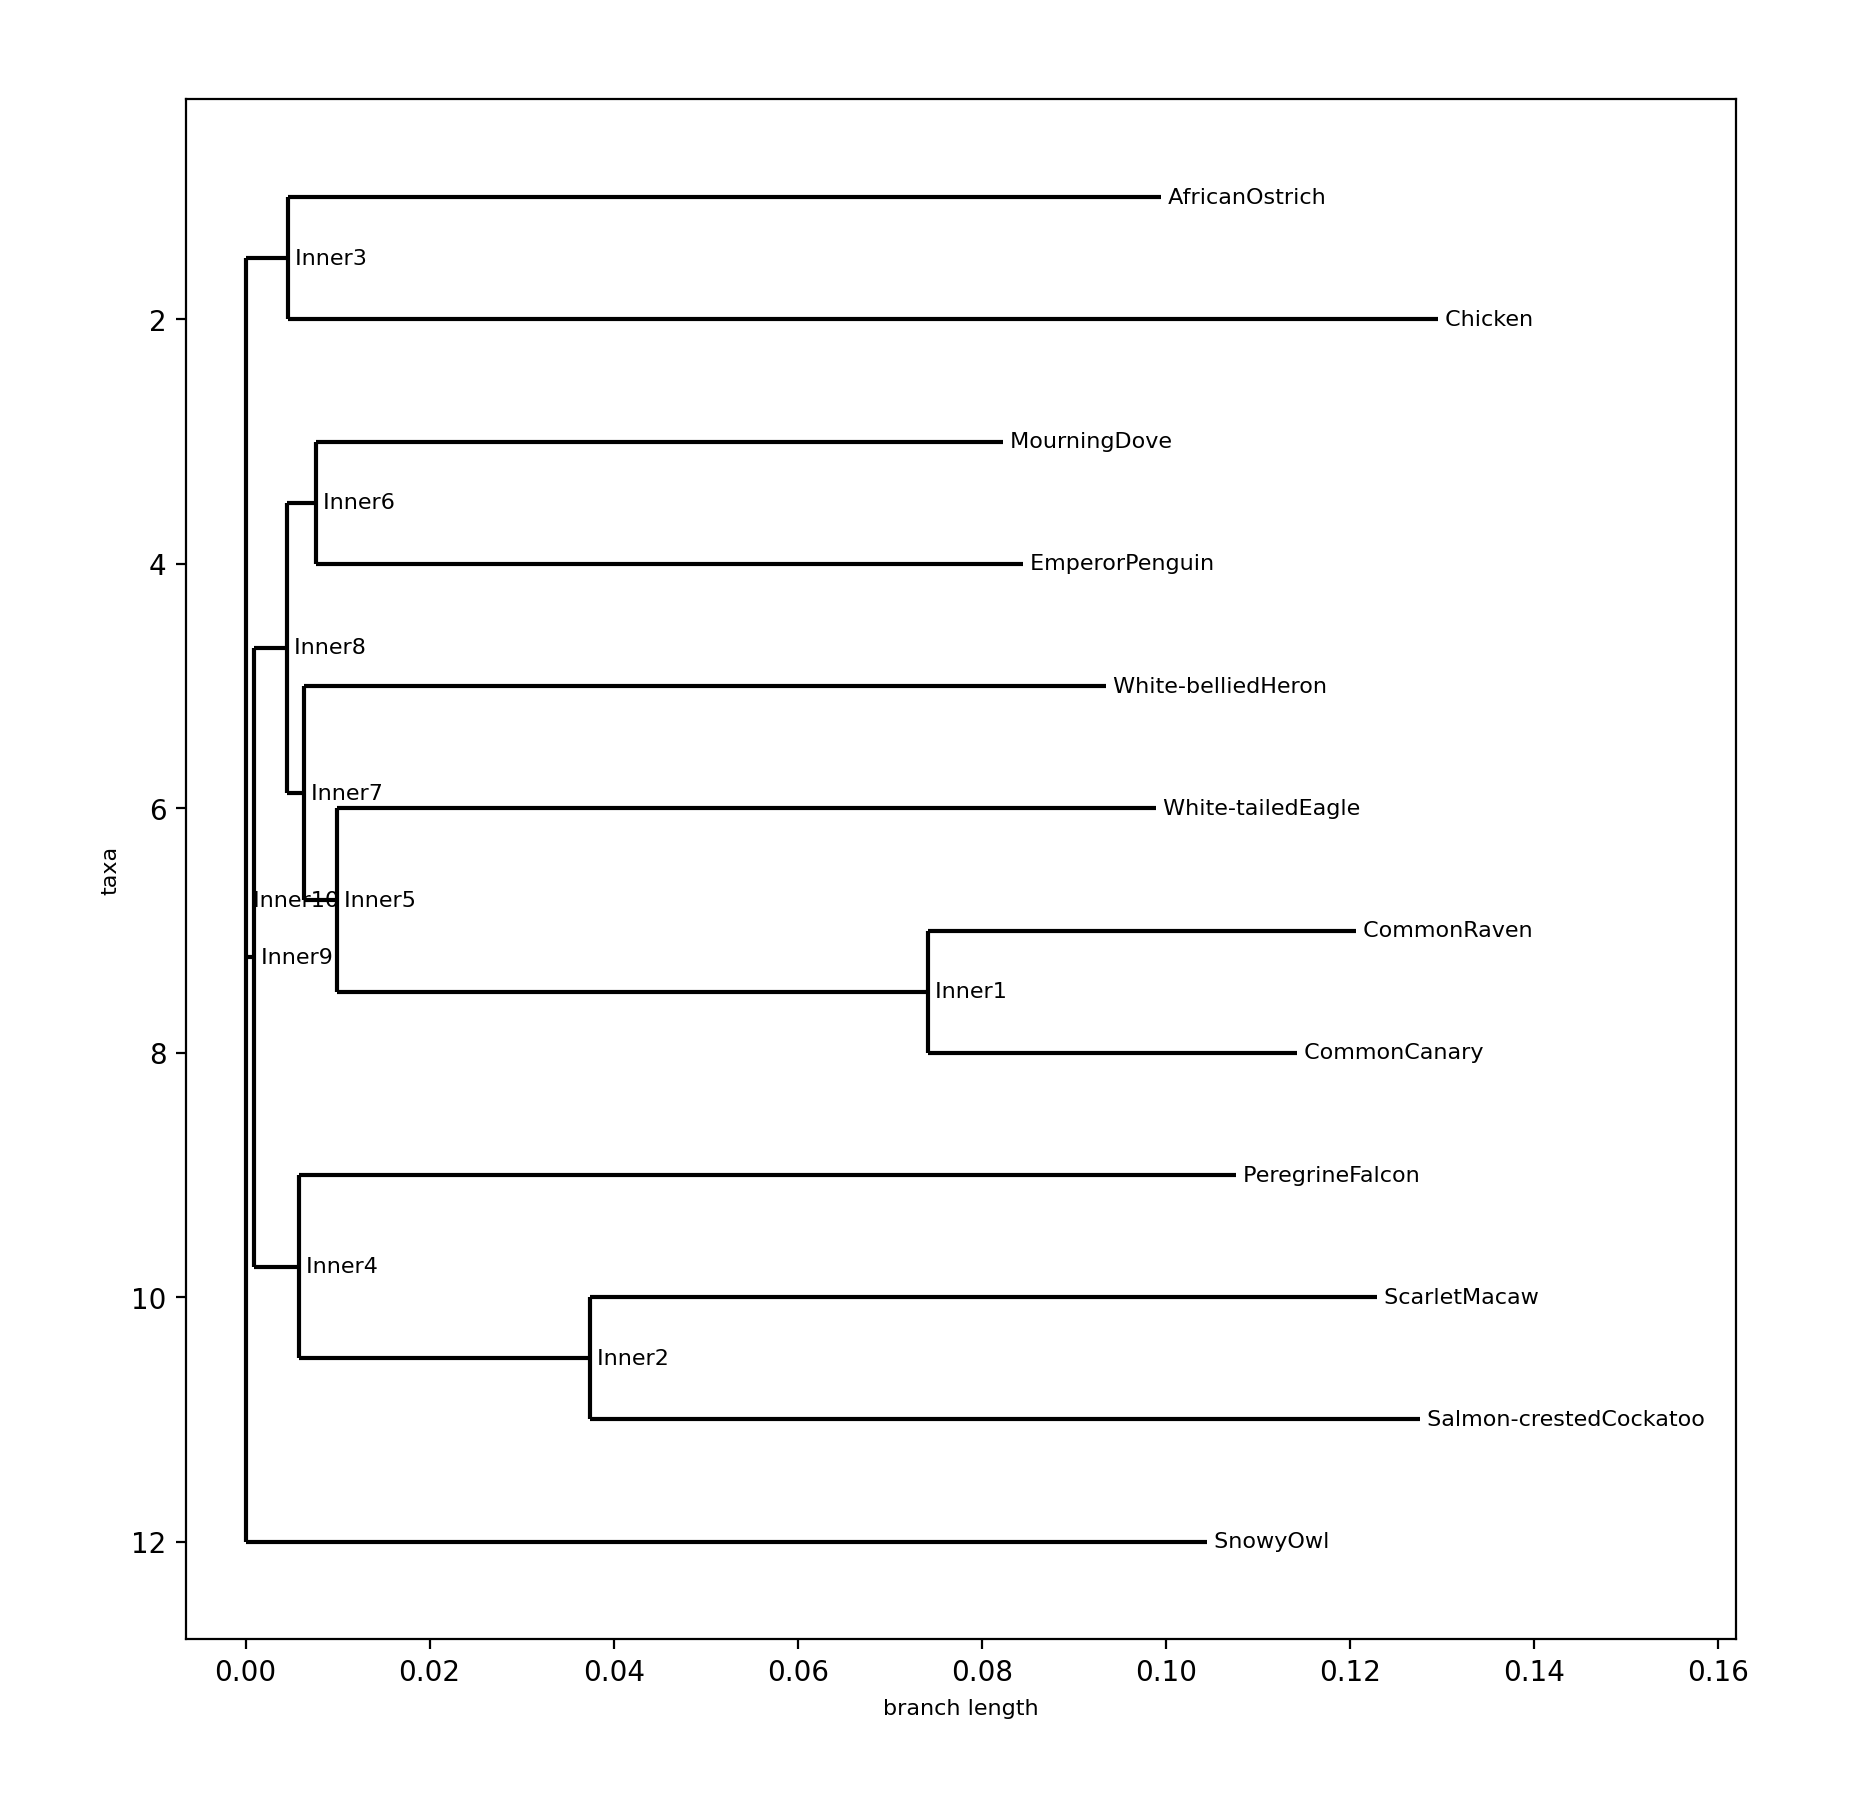

In [96]:
#neatening up the cladogram using matplotlib
fig = plt.figure(figsize=(10, 10), dpi=200) 
matplotlib.rc('font', size=8)             
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10)      
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(birds_tree, axes=axes)
fig.savefig("birds_cladogram")